# 0. IMPORTS

## 0.1. Libraries

In [18]:
import pandas as pd
import inflection
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Image

## 0.2. Helper Functions

## 0.3. Loading Data

In [2]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on = 'Store')

## 0.4. Graph Visualization

In [3]:
from IPython.core.display import HTML

def jupyter_settings():
   %matplotlib inline
   %pylab inline
   plt.style.use( 'bmh' )
   plt.rcParams['figure.figsize'] = [18, 8]
   plt.rcParams['font.size'] = 20
   display( HTML( '<style>.container { width:100% !important; }</style>') )
   pd.options.display.max_columns = None
   pd.options.display.max_rows = None
   pd.set_option( 'display.expand_frame_repr', False )
   sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 1. DESCRIBE DATA

In [4]:
df1 = df_raw.copy()

## 1.1. Rename Columns

In [5]:
# list(df1.columns)

cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
            'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

# CamelCase to SnakeCase
snakecase = lambda x: inflection.underscore(x)

cols_new = list( map( snakecase, cols_old ) )

# rename
df1.columns = cols_new

## 1.2. Data Dimensions

In [6]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 1017209
Number of Columns: 18


## 1.3. Data Types

In [7]:
df1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
353212,1064,5,2014-08-29,10844,1164,1,0,0,0,a,c,420.0,NaN,NaN,0,NaN,NaN,NaN


In [8]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [9]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

In [10]:
# competition_distance (2642 NAs)

# df1['competition_distance'].max() = 75860.0

df1['competition_distance'] = df1['competition_distance'].fillna(200000)


# competition_open_since_month (323348 NAs)
df1['competition_open_since_month'] = df1['competition_open_since_month'].fillna(df1['date'].dt.month)
# similarly: df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1 )


# competition_open_since_year (323348 NAs)
df1['competition_open_since_year'] = df1['competition_open_since_year'].fillna(df1['date'].dt.year)


# promo2_since_week (508031 NAs)
df1['promo2_since_week'] = df1['promo2_since_week'].fillna(df1['date'].dt.week)


# promo2_since_year (508031 NAs)
df1['promo2_since_year'] = df1['promo2_since_year'].fillna(df1['date'].dt.year)


# promo_interval (508031 NAs)
month_map = {1: 'Jan',
             2: 'Feb',
             3: 'Mar',
             4: 'Apr',
             5: 'May',
             6: 'Jun',
             7: 'Jul',
             8: 'Aug',
             9: 'Sep',
             10: 'Oct',
             11: 'Nov',
             12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True )

df1['month_map'] = df1['date'].dt.month.map( month_map )

# New variable: check if sales date was in the period of promotion
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 )

<ipython-input-10-669cc2e20aaf>:18: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df1['promo2_since_week'] = df1['promo2_since_week'].fillna(df1['date'].dt.week)


## 1.6. Change Data Type

In [11]:
# competition
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
    
# promo2
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7. Descriptive Statistics

In [12]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]'])

### 1.7.1. Numerical Variables

In [13]:
# Central Tendency - Mean, Median
ct1 = pd.DataFrame(num_attributes.mean())
ct2 = pd.DataFrame(num_attributes.median())

# Dispersion - Std, Min, Max, Range, Skew, Kurtosis
d1 = pd.DataFrame(num_attributes.std())
d2 = pd.DataFrame(num_attributes.min())
d3 = pd.DataFrame(num_attributes.max())
d4 = pd.DataFrame(num_attributes.max() - num_attributes.min())
d5 = pd.DataFrame(num_attributes.skew())
d6 = pd.DataFrame(num_attributes.kurtosis())

# concat
df_num = pd.concat([ct1, ct2, d1, d2, d3, d4, d5, d6], axis = 1)
df_num.columns = ['mean', 'median', 'std', 'min', 'max', 'range', 'skew', 'kurtosis']
df_num

,mean,median,std,min,max,range,skew,kurtosis
store,558.429727,558.0,321.908651,1.0,1115.0,1114.0,-0.000955,-1.200524
day_of_week,3.998341,4.0,1.997391,1.0,7.0,6.0,0.001593,-1.246873
sales,5773.818972,5744.0,3849.926175,0.0,41551.0,41551.0,0.641460,1.778375
customers,633.145946,609.0,464.411734,0.0,7388.0,7388.0,1.598650,7.091773
open,0.830107,1.0,0.375539,0.0,1.0,1.0,-1.758045,1.090723
promo,0.381515,0.0,0.485759,0.0,1.0,1.0,0.487838,-1.762018
school_holiday,0.178647,0.0,0.383056,0.0,1.0,1.0,1.677842,0.815154
competition_distance,5935.442677,2330.0,12547.652996,20.0,200000.0,199980.0,10.242344,147.789712
competition_open_since_month,6.786849,7.0,3.311087,1.0,12.0,11.0,-0.042076,-1.232607
competition_open_since_year,2010.324840,2012.0,5.515593,1900.0,2015.0,115.0,-7.235657,124.071304


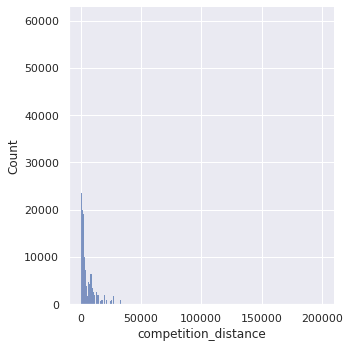

In [14]:
sns.displot(df1['competition_distance'], kde = False);

### 1.7.2. Categorical Variables

In [15]:
cat_attributes.apply( lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

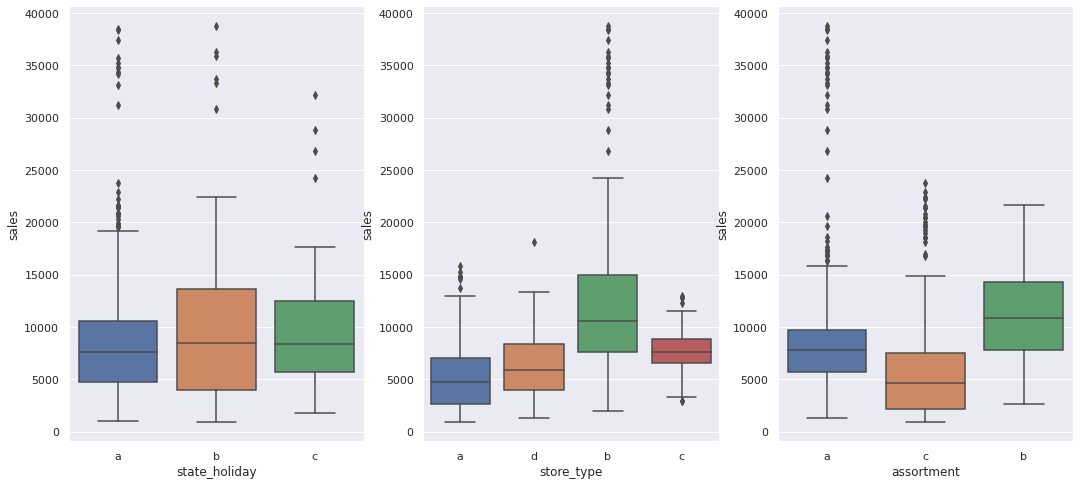

In [16]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)] # filtering data for better visualization

plt.subplot(1,3,1)
sns.boxplot(x = 'state_holiday', y = 'sales', data = aux1);

plt.subplot(1,3,2)
sns.boxplot(x = 'store_type', y = 'sales', data = aux1);

plt.subplot(1,3,3)
sns.boxplot(x = 'assortment', y = 'sales', data = aux1);

# 2. FEATURE ENGINEERING

In [17]:
df2 = df1.copy()

## 2.1. Hypothesis Mind Map

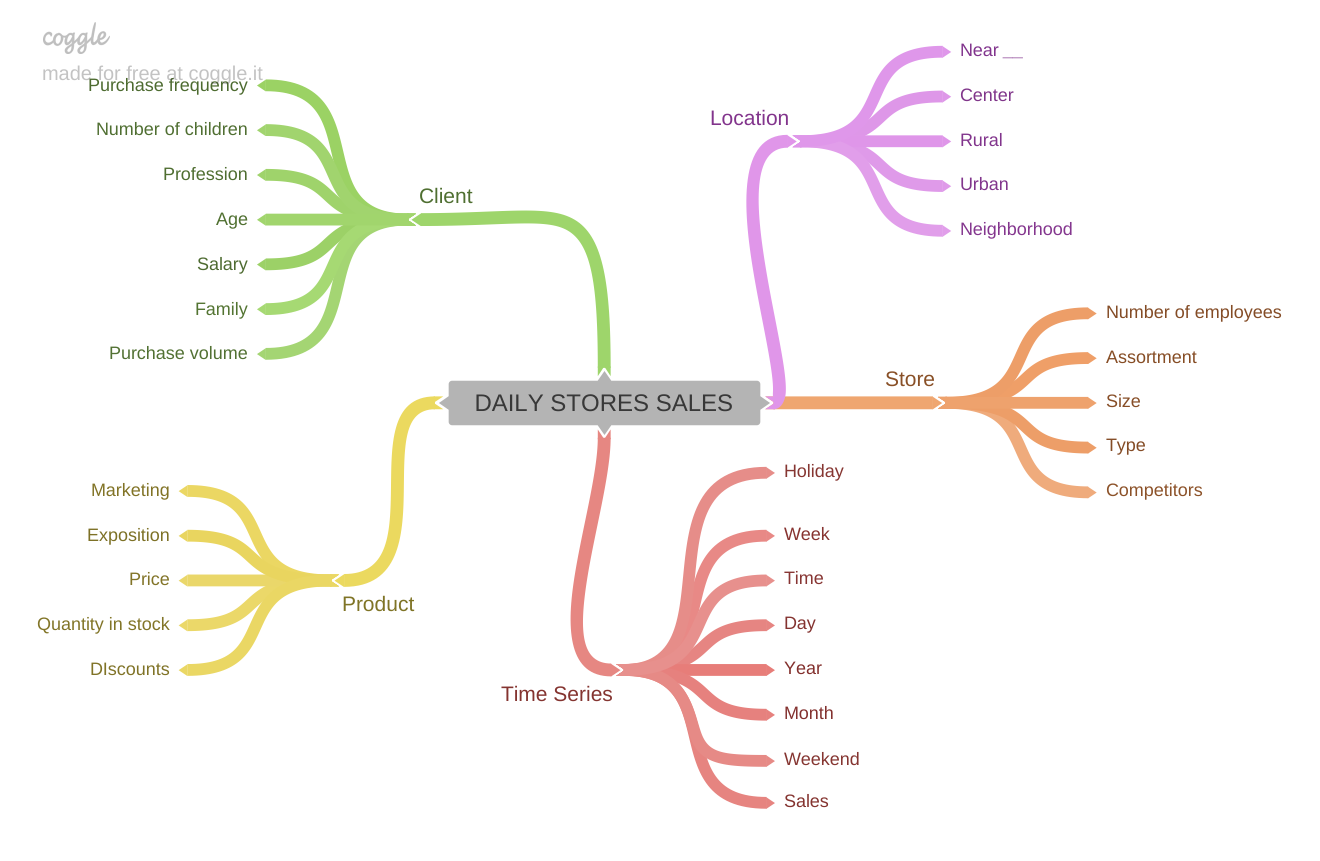

In [19]:
Image(filename='Daily_Store_Sales.png')

## 2.2. Hypothesis Development

Creation of hypothesis for each category in the Mind Map, while related to the response variable << **sales** >> .

PS.: Clients & Location: none information on dataset

### 2.2.1. Store Hypothesis

**1.** Stores with **more diversified products** should sell **more**

**2.** Stores with **closer competitors** should sell **less**

### 2.2.2. Product Hypothesis

**1.** Stores with **promoted products** should sell **more**

**2.** Stores with **closer competitors** should sell **less**

### 2.2.3. Time Series Hypothesis

**1.** Stores, in **holiday period**, should sell **more**

**2.** Stores, in **Christmas period**, should sell **more** than other holidays

**3.** Stores, during **weekends**, should sell **more**

**4.** In the **first 10 days of the month**, stores should sell **more**

**5** In the **first semester of the year**, stores should sell **less**

## 2.3. Feature Engineering

### 2.3.1. Created Columns

In [43]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# week_of_year
df2['week_of_year'] = df2['date'].dt.week

# year_and_week

###

# competition_since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year = x['competition_open_since_year'], month = x['competition_open_since_month'], day = 1), axis = 1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

# promo_since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days = 7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)

<ipython-input-43-bc813b88a300>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.week


### 2.3.2. Modified Columns

In [28]:
# state_holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

# assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# 3. FILTERING VARIABLES

In [63]:
df3 = df2.copy()

In [61]:
df3.sample(5)

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,promo2,is_promo,year,month,week_of_year,competition_since,competition_time_month,promo_since,promo_time_week
401956,96,1,2014-07-07,4946,0,regular_day,0,a,basic,8780.0,1,1,2014,7,28,2005-02-01,114,2009-09-07,252
806514,40,1,2013-07-08,4316,0,regular_day,0,a,basic,180.0,1,0,2013,7,28,2013-07-01,0,2009-11-02,192
813748,584,2,2013-07-02,5751,1,regular_day,0,d,basic,1360.0,1,0,2013,7,27,2013-07-01,0,2010-08-23,149
478965,301,1,2014-04-28,6451,1,regular_day,1,a,extended,4510.0,0,0,2014,4,18,2015-03-01,-11,2014-04-28,0
484549,310,3,2014-04-23,7038,0,regular_day,1,a,extended,2290.0,1,0,2014,4,17,2014-04-01,0,2014-03-03,7


## 3.1. Filtering Rows

In [64]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 3.2. Columns Selection

In [65]:
cols_drop = ['customers', 'open', 'competition_open_since_month' , 'competition_open_since_year', 'promo2_since_week',
             'promo2_since_year', 'promo_interval', 'month_map']
df3 = df3.drop(cols_drop, axis=1)